In [121]:
import math
from pyxtal import pyxtal

#CORRECTLY WEIGHTED DISTANCES FOR T_d, so the input can be done in terms of the bond lengths
bond_length = 1.89
def td(bond):
    return (-bond/math.sqrt(3),-bond/math.sqrt(3),bond/math.sqrt(3)),  (-bond/math.sqrt(3),bond/math.sqrt(3),-bond/math.sqrt(3)), (bond/math.sqrt(3),-bond/math.sqrt(3),-bond/math.sqrt(3)),  (bond/math.sqrt(3), bond/math.sqrt(3), bond/math.sqrt(3))

def atomic_c3v_2nd_neighbours(d):
    return (0,0,d), (d*math.sqrt(3)/2,0,-d/2), (-d*math.sqrt(3)/4,3*d/4,-d/2), (-d*math.sqrt(3)/4,-3*d/4,-d/2), (d*math.sqrt(3)/2,0,d*3/2), (-d*math.sqrt(3)/4,3*d/4,d*3/2), (-d*math.sqrt(3)/4,-3*d/4,d*3/2), (d*math.sqrt(3)/2,0,-d*3/2), (-d*math.sqrt(3)/4,3*d/4,-d*3/2), (-d*math.sqrt(3)/4,-3*d/4,-d*3/2)


def distance(x1,x2):
    summa=0
    for i in range(len(x1)):
        summa += (x2[i]-x1[i])**2
    return math.sqrt(summa)
print(distance(td(bond_length)[3],(0,0,0)))
print(td(bond_length))

#Define a crystal in 3D, space group 216 (Td), being carbon atoms with 12 atoms in the primitive cell (6H-SiC)
my_crystal = pyxtal()
my_crystal.from_random(3, 216, ['C'], [12])
my_crystal

1.89
((-1.0911920087683926, -1.0911920087683926, 1.0911920087683926), (-1.0911920087683926, 1.0911920087683926, -1.0911920087683926), (1.0911920087683926, -1.0911920087683926, -1.0911920087683926), (1.0911920087683926, 1.0911920087683926, 1.0911920087683926))



------Crystal from random------
Dimension: 3
Composition: C12
Group: F -4 3 m (216)
  5.6066,   5.6066,   5.6066,  90.0000,  90.0000,  90.0000, cubic
Wyckoff sites:
	 C @ [ 0.2500  0.2500  0.2500], WP [4c] Site [-43m]
	 C @ [ 0.0000  0.0000  0.0000], WP [4a] Site [-43m]
	 C @ [ 0.5000  0.5000  0.5000], WP [4b] Site [-43m]

C3v symmetry:
((0, 0, 1.89), (1.636788013152589, 0, -0.945), (-0.8183940065762945, 1.4175, -0.945), (-0.8183940065762945, -1.4175, -0.945))
Td symmetry:
((-1.0911920087683926, -1.0911920087683926, 1.0911920087683926), (-1.0911920087683926, 1.0911920087683926, -1.0911920087683926), (1.0911920087683926, -1.0911920087683926, -1.0911920087683926), (1.0911920087683926, 1.0911920087683926, 1.0911920087683926))


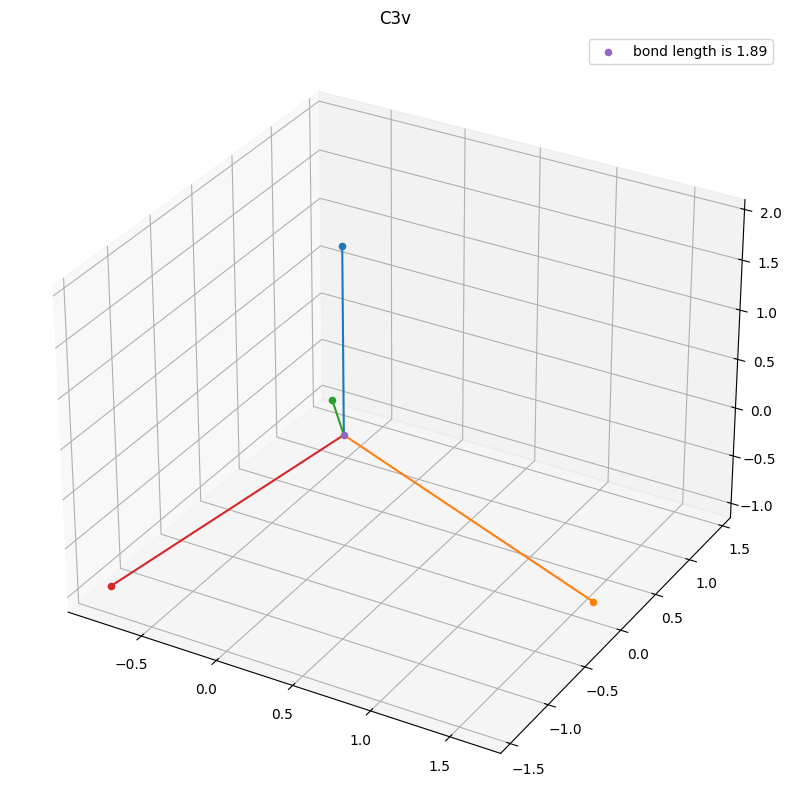

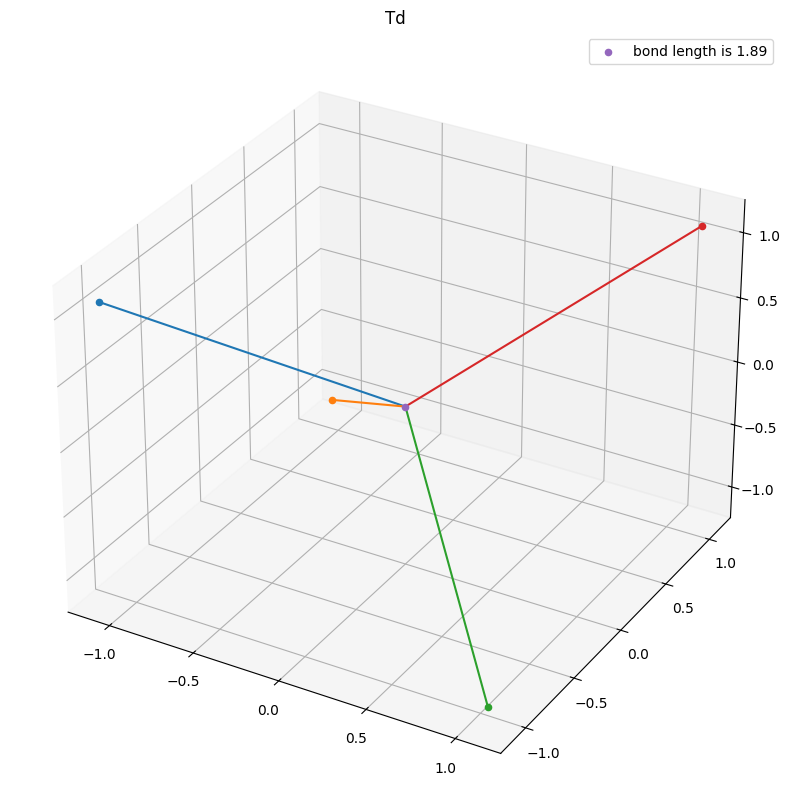

In [65]:
import math
import itertools
import matplotlib.pyplot as plt
import pandas as pd

bond_length = 1.89
d = (bond_length*2)/math.sqrt(3)
x1=[-1/2,-1/2,1/2]
x2=[-1/2,1/2,-1/2]
x3=[1/2,-1/2,-1/2]
x4=[1/2,1/2,1/2]
Y =[0,0,0]
coords = [x1,x2,x3,x4,Y]
combinations = list(itertools.combinations(coords, 2))
def distance(x1,x2):
    summa=0
    for i in range(len(x1)):
        summa += (x2[i]-x1[i])**2
    return math.sqrt(summa)

def atomic_c3v_dataframe(d):
    data = {'1': [0,0,d],
           '2': [d*math.sqrt(3)/2,0,-d/2],
           '3': [-d*math.sqrt(3)/4,3*d/4,-d/2],
           '4': [-d*math.sqrt(3)/4,-3*d/4,-d/2]}
    df = pd.DataFrame(data)
    return df.transpose()

#The input can be directly the bond lenght
def atomic_c3v(d):
    return (0,0,d), (d*math.sqrt(3)/2,0,-d/2), (-d*math.sqrt(3)/4,3*d/4,-d/2), (-d*math.sqrt(3)/4,-3*d/4,-d/2)

#The input has to be 'd', a distance computed with the bond length
def atomic_td(d):
    return (-d/2,-d/2,d/2),  (-d/2,d/2,-d/2),  (d/2,-d/2,-d/2),  (d/2,d/2,d/2)
print("C3v symmetry:")
print(atomic_c3v(bond_length))
print("Td symmetry:")
print(atomic_td(d))

#WE PUT bond_length in
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
for coords in atomic_c3v(bond_length):
    ax.scatter3D(coords[0],coords[1],coords[2])
    ax.plot((0,coords[0]),(0,coords[1]),(0,coords[2]))
ax.scatter3D(0,0,0, label=f'bond length is {distance(atomic_c3v(bond_length)[3],(0,0,0))}')
plt.legend()
plt.title("C3v")
plt.show()

#WE PUT d in, and therefore the distance is correctly given
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
for coords in atomic_td(d):
    ax.scatter3D(coords[0],coords[1],coords[2])
    ax.plot((0,coords[0]),(0,coords[1]),(0,coords[2]))
ax.scatter3D(0,0,0, label=f'bond length is {distance(atomic_td(d)[3],(0,0,0))}')
plt.title("Td")
plt.legend()
plt.show()


1.89
C3v symmetry:
((0, 0, 1.89), (1.636788013152589, 0, -0.945), (-0.8183940065762945, 1.4175, -0.945), (-0.8183940065762945, -1.4175, -0.945), (1.636788013152589, 0, 2.835), (-0.8183940065762945, 1.4175, 2.835), (-0.8183940065762945, -1.4175, 2.835), (1.636788013152589, 0, -2.835), (-0.8183940065762945, 1.4175, -2.835), (-0.8183940065762945, -1.4175, -2.835))
1.636788013152589


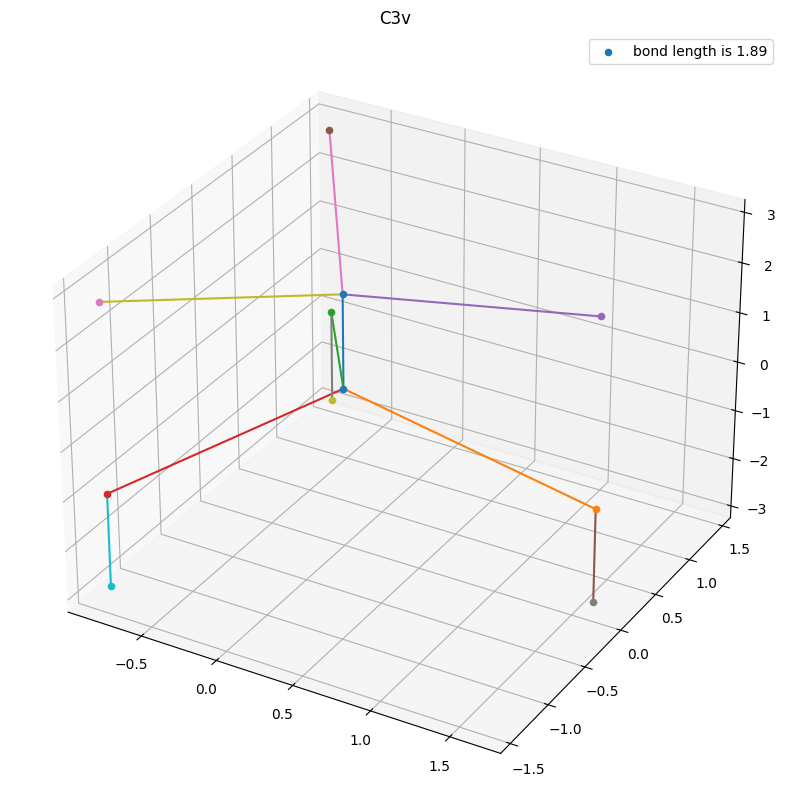

In [64]:
import math
import itertools
import matplotlib.pyplot as plt

bond_length = 1.89
d = (bond_length*2)/math.sqrt(3)
x1=[-1/2,-1/2,1/2]
x2=[-1/2,1/2,-1/2]
x3=[1/2,-1/2,-1/2]
x4=[1/2,1/2,1/2]
Y =[0,0,0]
coords = [x1,x2,x3,x4,Y]
combinations = list(itertools.combinations(coords, 2))
def distance(x1,x2):
    summa=0
    for i in range(len(x1)):
        summa += (x2[i]-x1[i])**2
    return math.sqrt(summa)

print(distance((0, 0, 1.89), (0, 0, 0)))

def atomic_c3v_2nd_neighbours(d):
    return (0,0,d), (d*math.sqrt(3)/2,0,-d/2), (-d*math.sqrt(3)/4,3*d/4,-d/2), (-d*math.sqrt(3)/4,-3*d/4,-d/2), (d*math.sqrt(3)/2,0,d*3/2), (-d*math.sqrt(3)/4,3*d/4,d*3/2), (-d*math.sqrt(3)/4,-3*d/4,d*3/2), (d*math.sqrt(3)/2,0,-d*3/2), (-d*math.sqrt(3)/4,3*d/4,-d*3/2), (-d*math.sqrt(3)/4,-3*d/4,-d*3/2)

print("C3v symmetry:")
print(atomic_c3v_2nd_neighbours(bond_length))


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
t=0
for coords in atomic_c3v_2nd_neighbours(bond_length):
    ax.scatter3D(coords[0],coords[1],coords[2])
    if t<4:
        ax.plot((0,coords[0]),(0,coords[1]),(0,coords[2]))   
    t=t+1
print(atomic_c3v_2nd_neighbours(bond_length)[4][0])
for t in range(3):
    ax.plot((atomic_c3v_2nd_neighbours(bond_length)[0][0],atomic_c3v_2nd_neighbours(bond_length)[4+t][0]),(atomic_c3v_2nd_neighbours(bond_length)[0][1],atomic_c3v_2nd_neighbours(bond_length)[4+t][1]),(atomic_c3v_2nd_neighbours(bond_length)[0][2],atomic_c3v_2nd_neighbours(bond_length)[4+t][2]))    
    ax.plot((atomic_c3v_2nd_neighbours(bond_length)[1+t][0],atomic_c3v_2nd_neighbours(bond_length)[7+t][0]),(atomic_c3v_2nd_neighbours(bond_length)[1+t][1],atomic_c3v_2nd_neighbours(bond_length)[7+t][1]),(atomic_c3v_2nd_neighbours(bond_length)[1+t][2],atomic_c3v_2nd_neighbours(bond_length)[7+t][2]))    
ax.scatter3D(0,0,0, label=f'bond length is {distance(atomic_c3v_2nd_neighbours(bond_length)[3],(0,0,0))}')
plt.legend()
plt.title("C3v")
plt.show()

In [37]:
lengths = [17.01, 15.12, 13.23, 11.34, 9.45, 7.56, 5.67, 3.78, 1.89, 1.701, 1.512, 1.323, 1.134, 0.945, 0.63, 0.4725, 0.378, 0.315, 0.26999999999999996, 0.23625, 0.21]
for l in lengths:
    print(atomic_c3v_dataframe(l))

          0        1       2
1  0.000000  0.00000  1.7010
2  1.473109  0.00000 -0.8505
3 -0.736555  1.27575 -0.8505
4 -0.736555 -1.27575 -0.8505
          0      1      2
1  0.000000  0.000  1.512
2  1.309430  0.000 -0.756
3 -0.654715  1.134 -0.756
4 -0.654715 -1.134 -0.756
          0        1       2
1  0.000000  0.00000  1.3230
2  1.145752  0.00000 -0.6615
3 -0.572876  0.99225 -0.6615
4 -0.572876 -0.99225 -0.6615
          0       1      2
1  0.000000  0.0000  1.134
2  0.982073  0.0000 -0.567
3 -0.491036  0.8505 -0.567
4 -0.491036 -0.8505 -0.567
